In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [3]:
dt = pd.read_csv("bank.csv")
dt.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
dt.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

no     5873
yes    5289
Name: deposit, dtype: int64
['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']


<AxesSubplot:xlabel='deposit', ylabel='count'>

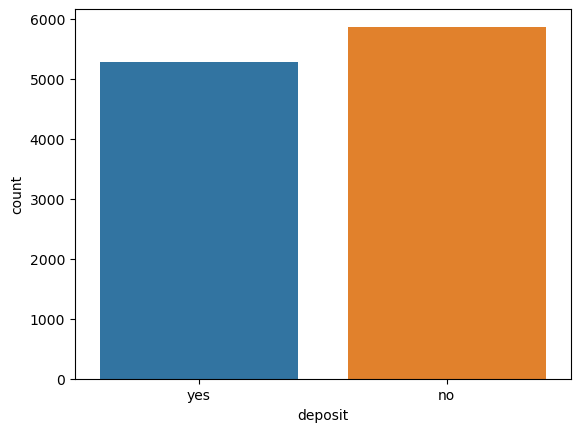

In [5]:
print(dt.deposit.value_counts())
lst = []
for i in range(len(dt["job"])):
    if dt["job"][i] not in lst:
        lst = lst + [dt["job"][i]]

print(lst)
sns.countplot(x="deposit", data=dt)

yes    5289
no     5289
Name: deposit, dtype: int64


<AxesSubplot:xlabel='deposit', ylabel='count'>

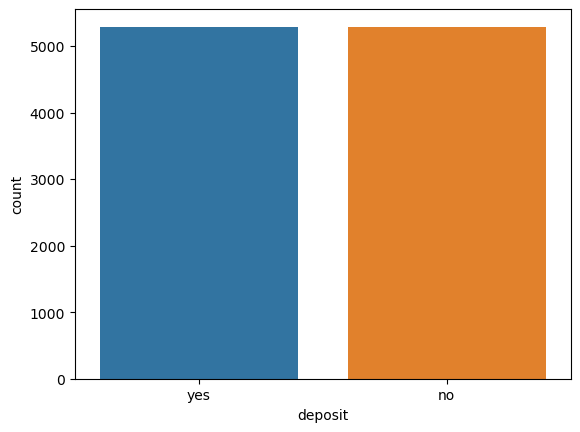

In [6]:

deposit = dt.loc[dt['deposit'] == "yes"]
no_deposit = dt.loc[dt['deposit'] == "no"][:5289]
normal_distributed_dt = pd.concat([no_deposit, deposit])
new_dt = normal_distributed_dt.sample(frac=1, random_state=42)
new_dt.head()
print(new_dt.deposit.value_counts())
sns.countplot(x = "deposit", data = new_dt)


In [7]:
new_dt.describe()
''' Deposit
0 - no
1 - yes'''

''' Job
0 - admin
1 - management
2 - technician
3 - blue-collar
4 - services
5 - retired
6 - self-employed
7 - unemployed
8 - housemaid
9 - entrepreneur
10 - student
11 - unknown'''

''' Education
0 - unknown
1 - primary
2 - secondary
3 - tertiary'''

''' Marital
0 - married
1 - single
2 - divorced'''

''' Default
0 - no
1 - yes'''

''' Housing
0 - no
1 - yes'''


''' Loan
0 - no
1 - yes'''

''' Job
0 - jan
1 - feb
2 - march
3 - apr
4 - may
5 - jun
6 - jul
7 - aug
8 - sep
9 - oct
10 - nov
11 - dec'''

''' Poutcomme
0 - unknown
1 - failure
2 - success
3 - other'''

numeric_dt = new_dt
numeric_dt["deposit"] = numeric_dt["deposit"].replace(["yes", "no"], [1, 0])
numeric_dt["job"] = numeric_dt["job"].replace(["admin.", "management", "technician", "blue-collar"
, "services", "retired", "self-employed", "unemployed", "housemaid", "entrepreneur", "student", "unknown"], 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
numeric_dt["education"] = numeric_dt["education"].replace(["unknown", "primary", "secondary", "tertiary"],
[0, 1, 2, 3])
numeric_dt["marital"] = numeric_dt["marital"].replace(["married", "single", "divorced"], [0, 1, 2])
numeric_dt["default"] = numeric_dt["default"].replace(["yes", "no"], [1, 0])
numeric_dt["housing"] = numeric_dt["housing"].replace(["yes", "no"], [1, 0])
numeric_dt["loan"] = numeric_dt["loan"].replace(["yes", "no"], [1, 0])
numeric_dt["month"] = numeric_dt["month"].replace(["jan", "feb", "mar", "apr"
, "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"], 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
numeric_dt["poutcome"] = numeric_dt["poutcome"].replace(["unknown", "failure", "success", "other"], [0, 1, 2, 3])
numeric_dt.drop("contact",axis=1,inplace=True)
numeric_dt



,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
68,41,0,0,1,0,-306,1,0,15,4,500,1,-1,0,0,1
1306,30,0,1,2,0,523,0,1,3,2,83,1,-1,0,0,1
4316,58,1,0,3,0,473,0,0,18,1,1109,1,262,1,2,1
2858,61,1,0,3,0,477,1,0,29,9,377,1,520,1,3,1
2491,36,1,1,3,0,3850,1,0,12,7,239,2,100,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,43,0,0,3,0,189,1,0,14,6,1062,4,-1,0,0,1
10480,36,4,0,2,0,5024,0,0,21,4,139,1,-1,0,0,0
101,35,3,0,1,0,102,1,0,20,4,1334,1,-1,0,0,1
6149,29,3,0,2,0,0,0,0,10,6,45,1,-1,0,0,0


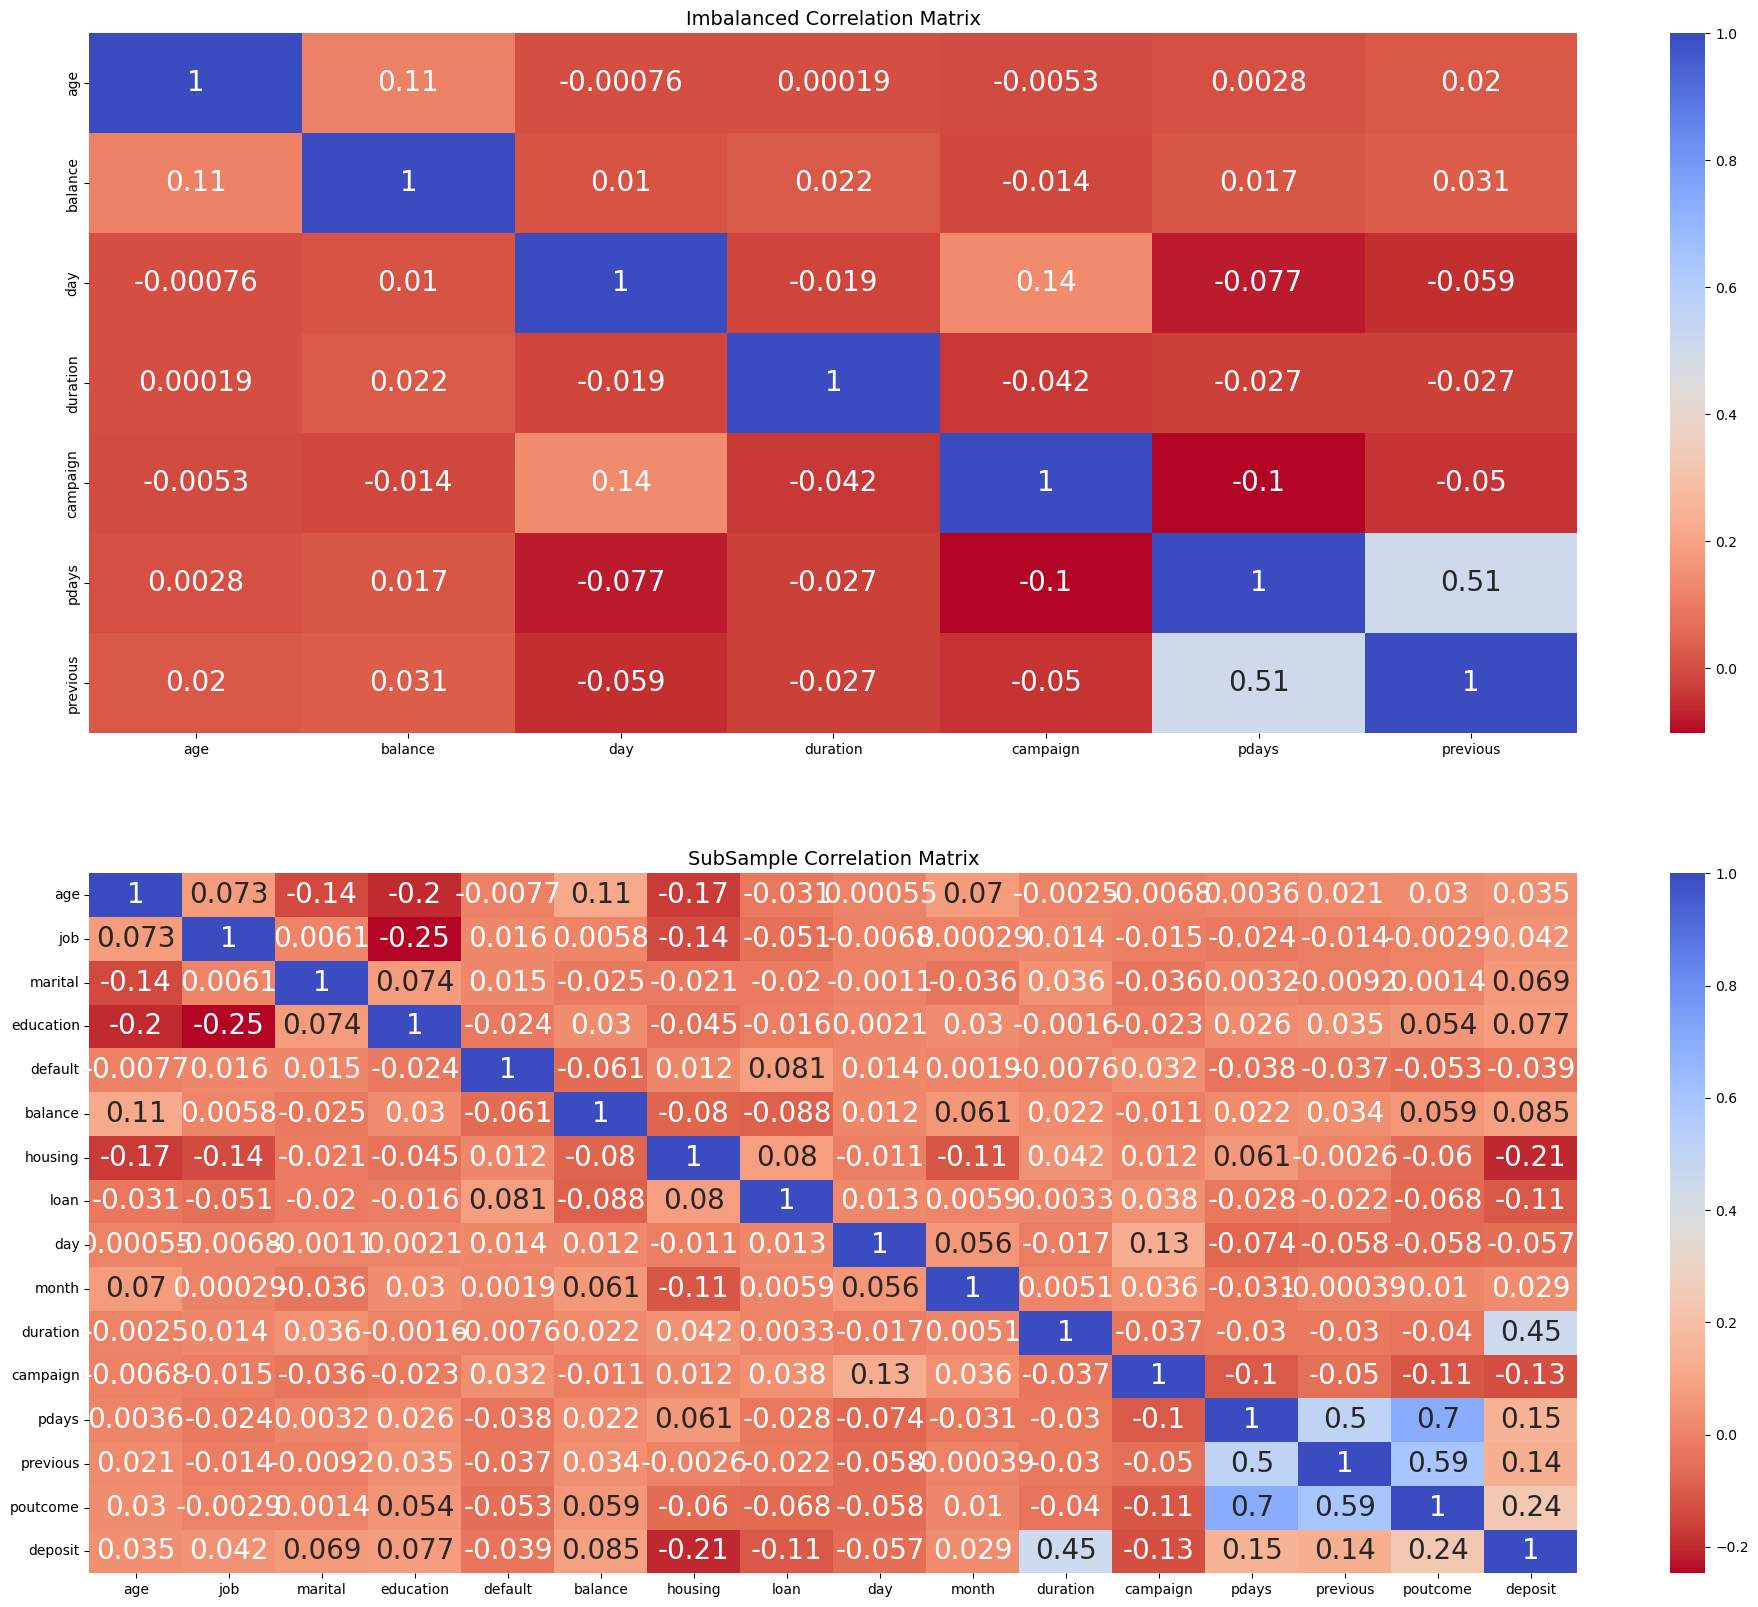

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = dt.corr()
sns.heatmap(corr, cmap='coolwarm_r',annot=True,annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)


sub_sample_corr = numeric_dt.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r',annot=True, annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

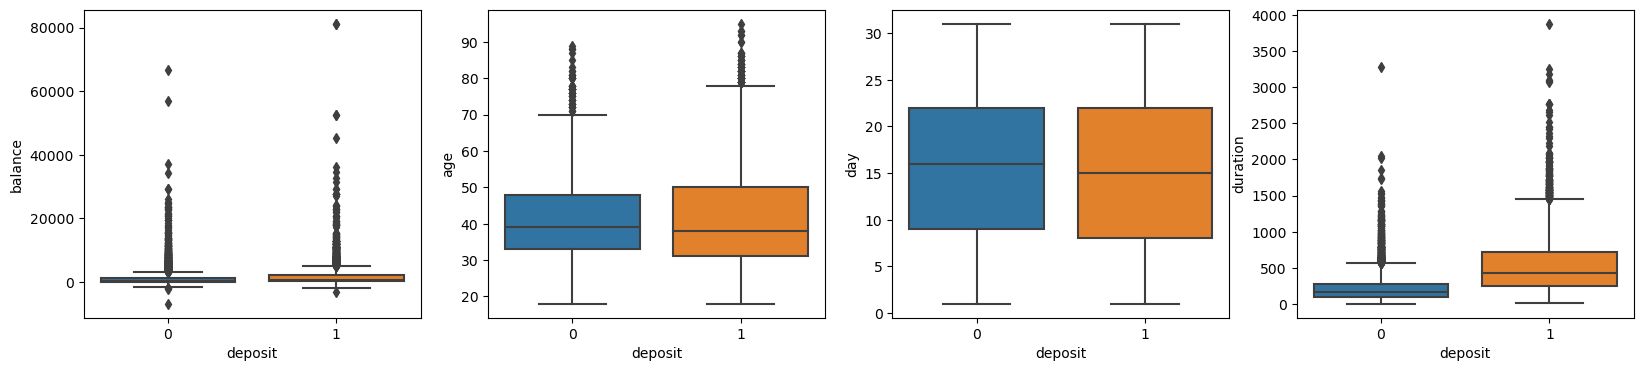

In [9]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="deposit", y="balance", data=new_dt, ax=axes[0])

sns.boxplot(x="deposit", y="age", data=new_dt, ax=axes[1])

sns.boxplot(x="deposit", y="day", data=new_dt, ax=axes[2])

sns.boxplot(x="deposit", y="duration", data=new_dt, ax=axes[3])




plt.show()

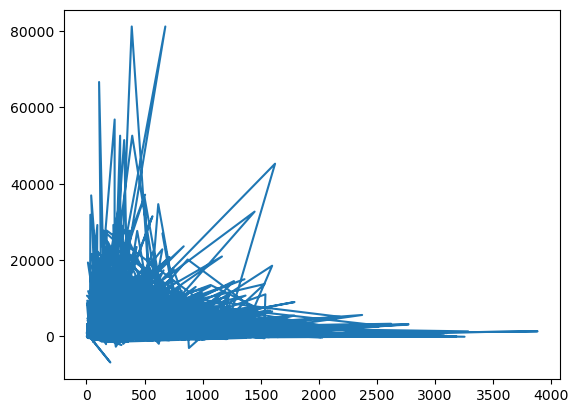

In [49]:
plt.plot(dt["duration"], dt["balance"])

'age  housing  month  duration  pdays  poutcome  deposit'

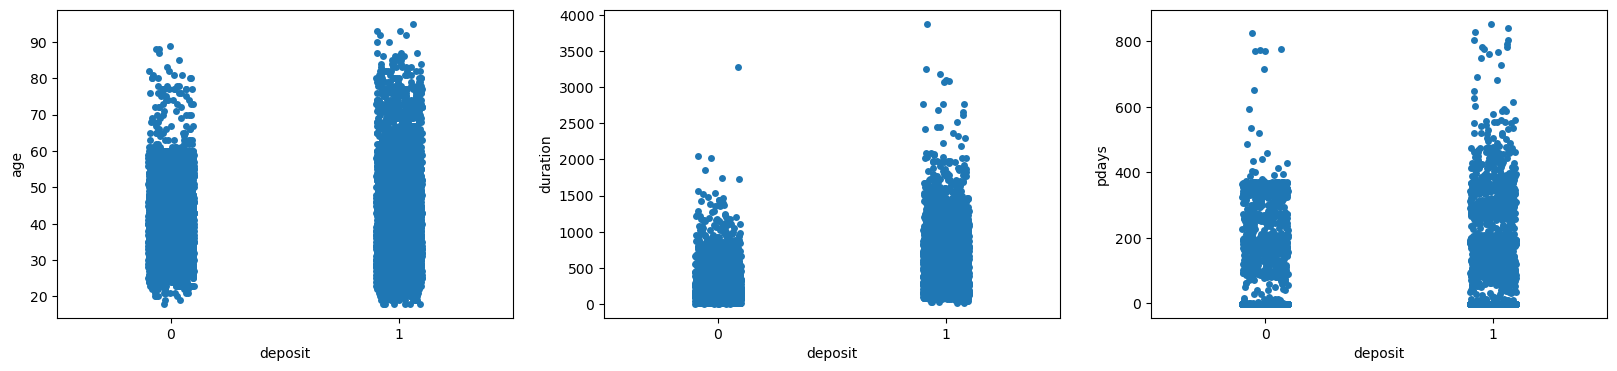

In [43]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))



sns.stripplot(y="age",x="deposit", data = numeric_dt, ax = axes[0])

sns.stripplot(y="duration",x="deposit", data = numeric_dt, ax = axes[1])

sns.stripplot(y="pdays",x="deposit", data = numeric_dt, ax = axes[2])



"age  housing  month  duration  pdays  poutcome  deposit"

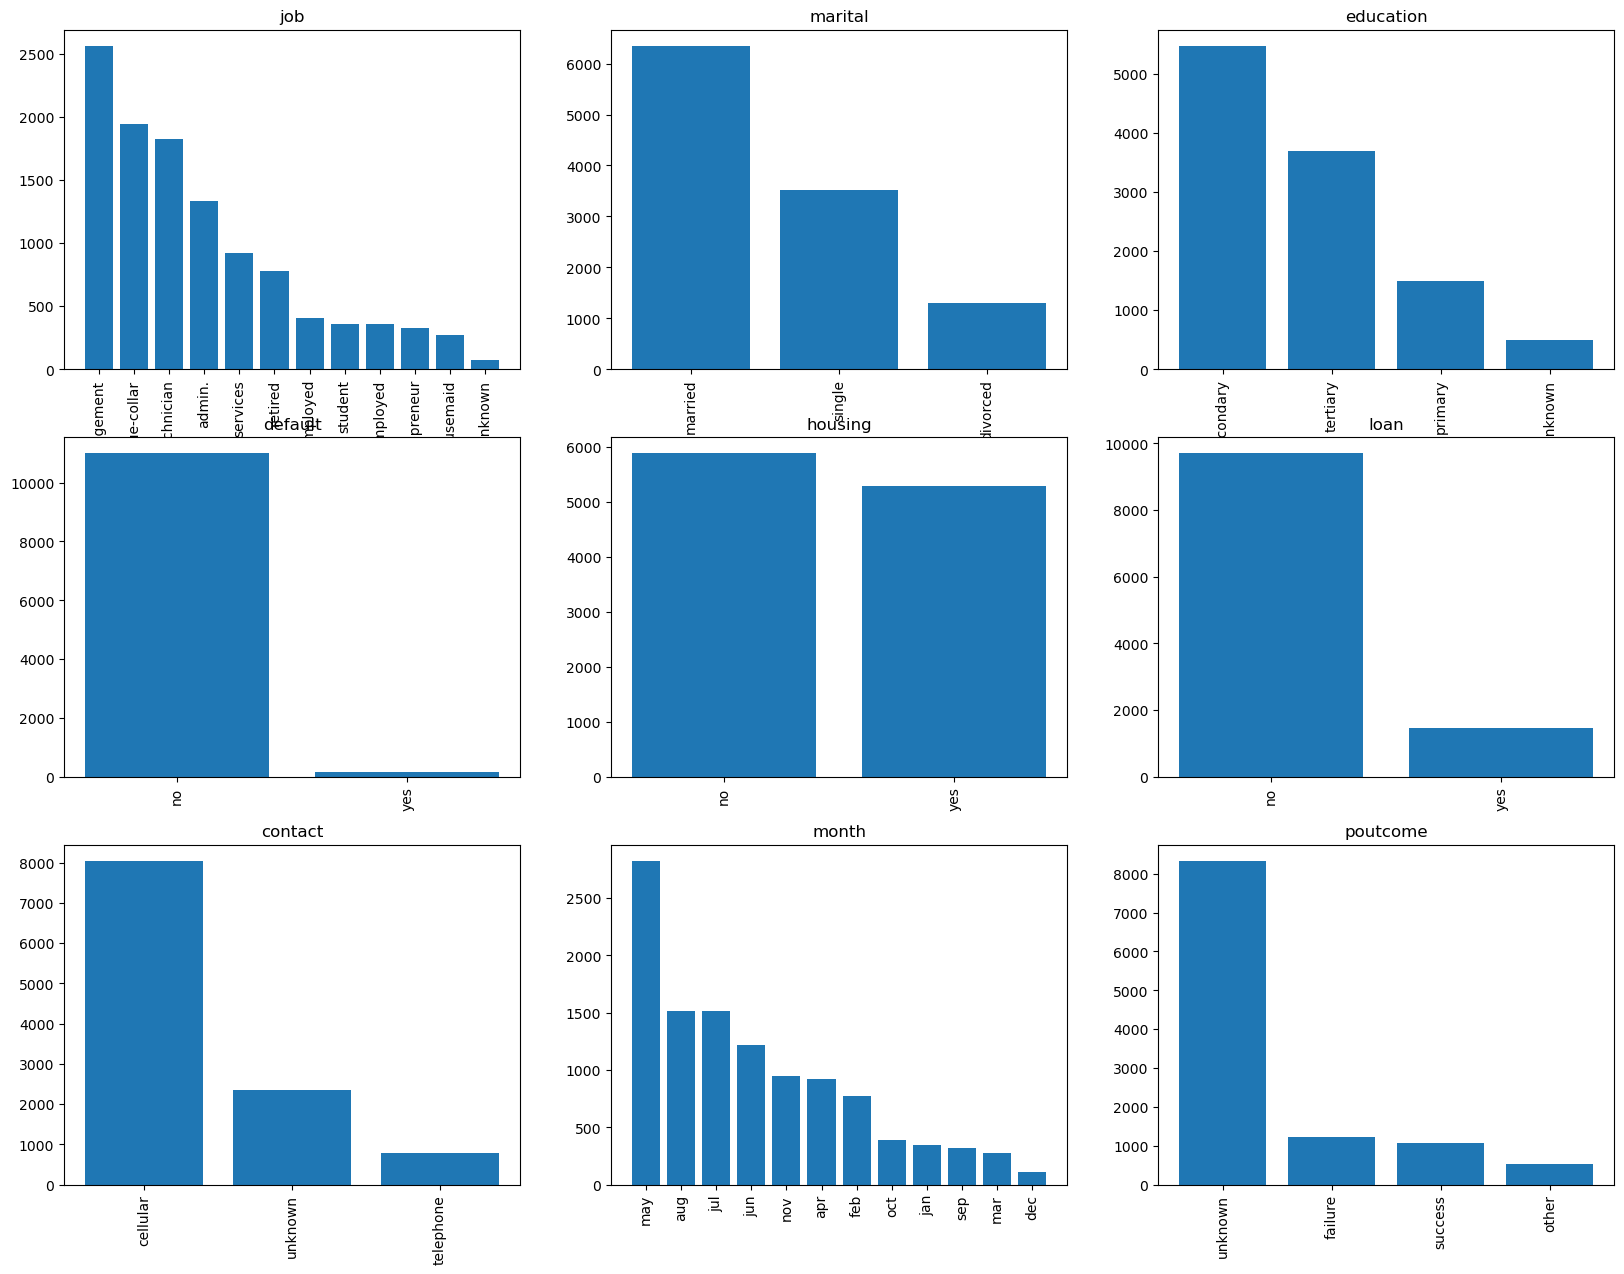

In [45]:
#categorical columns
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = dt[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

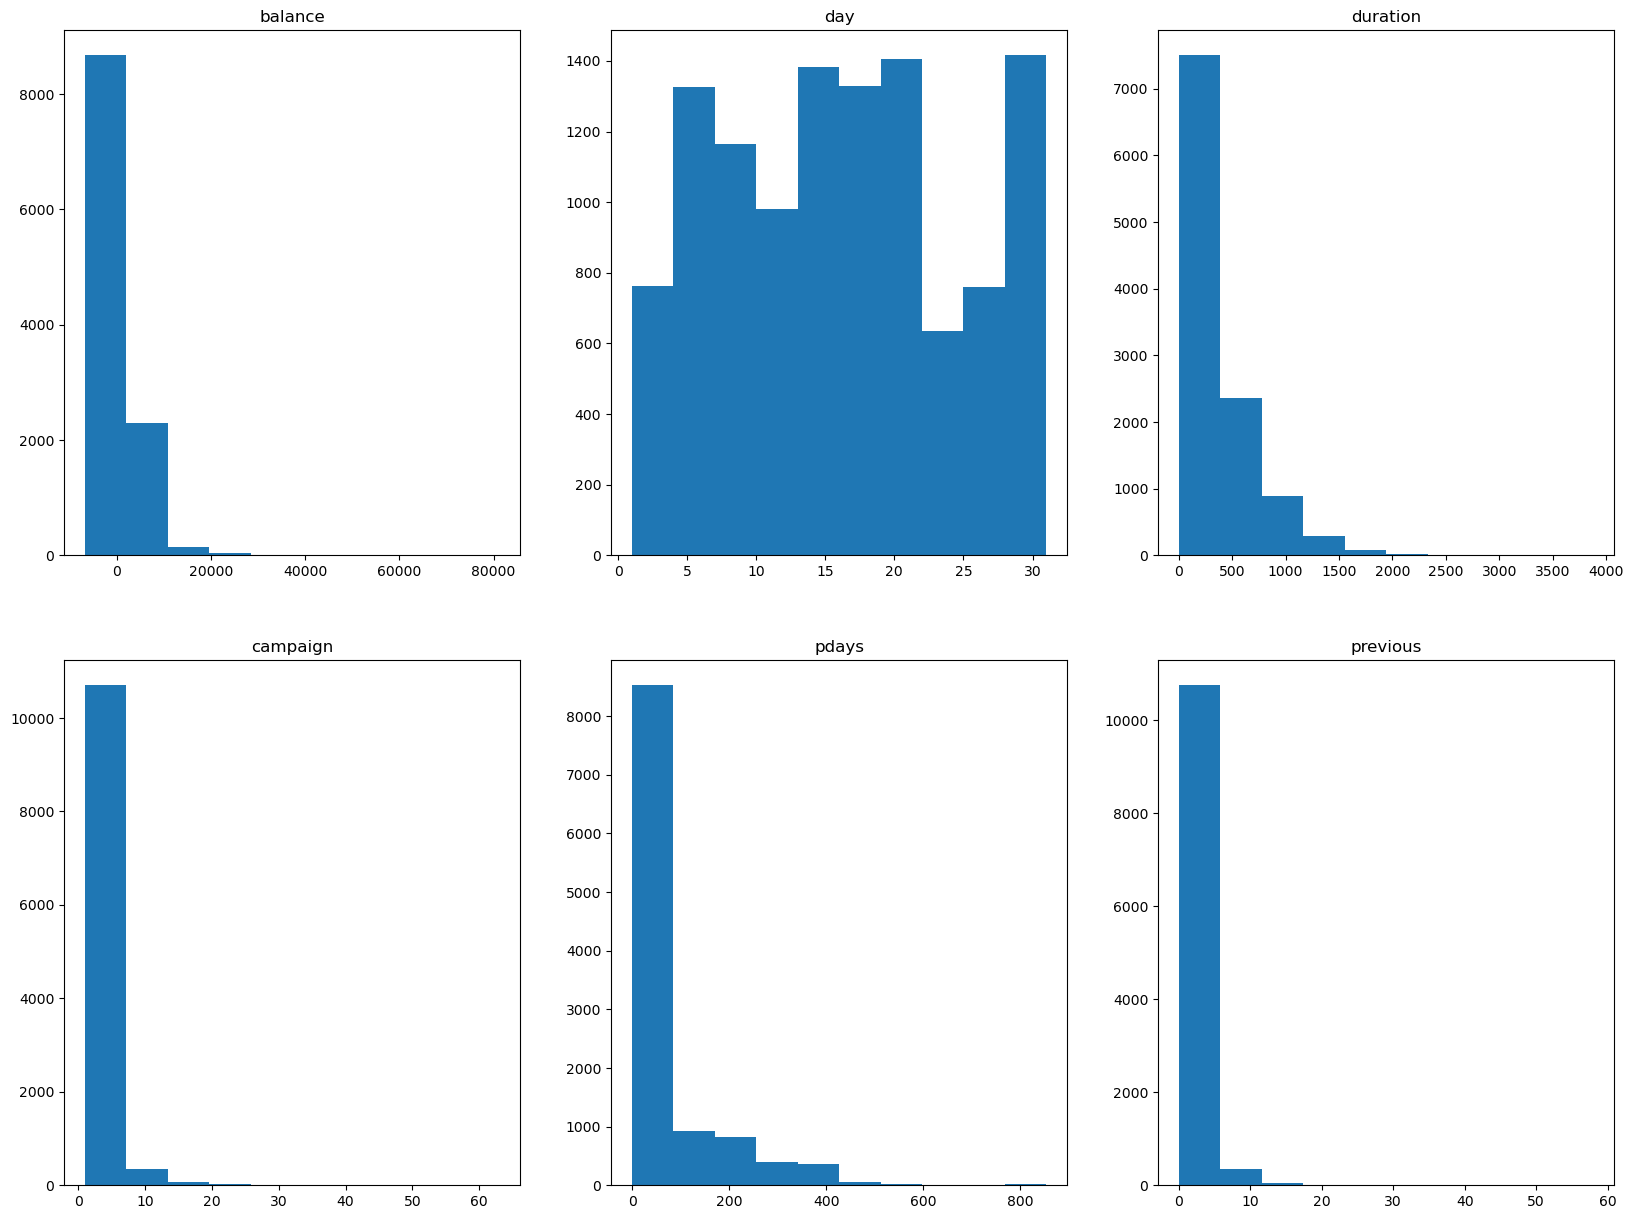

In [46]:
#numerical columns
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(dt[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [11]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(numeric_dt, numeric_dt['deposit'], test_size=0.2, random_state=0 )

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

regressor = RandomForestClassifier()
_ = regressor.fit(X_train, Y_train)
print(regressor.score(X_test, Y_test))

n = 7
rfe = RFE(regressor, n_features_to_select=n)
rfe.fit(X_train, Y_train)

print(rfe.ranking_)
print(rfe.support_)
new_short_dt = X_train.loc[:,rfe.support_]
print(new_short_dt)


1.0
[ 1  6  8  7 10  3  1  9  4  1  1  5  1  2  1  1]
[ True False False False False False  True False False  True  True False
  True False  True  True]
       age  housing  month  duration  pdays  poutcome  deposit
8991    44        0      7       199     -1         0        0
3322    34        0      2       212    181         2        1
10548   60        1      6       380     -1         0        0
5570    39        1      4       161     -1         0        0
2059    31        1      4       666    360         2        1
...    ...      ...    ...       ...    ...       ...      ...
6095    55        0     10        54     -1         0        0
7255    42        1      6       178     -1         0        0
1216    30        0      1       123     -1         0        1
2728    54        0      9       194     94         2        1
10156   42        0      7       277     -1         0        0

[8462 rows x 7 columns]


In [13]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(new_short_dt, new_short_dt['deposit'], test_size=0.2, random_state=0 )

Logical Regression

In [28]:
from sklearn.model_selection import train_test_split
X = new_short_dt.loc[:, new_short_dt.columns != 'deposit']
y = new_short_dt.loc[:, new_short_dt.columns == 'deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


log_R = LogisticRegression()
log_R.fit(X_train, np.ravel(y_train))
y_pred = log_R.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_R.score(X_test, y_test)))
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print("Classification Report")
print(cr)


Accuracy of logistic regression classifier on test set: 0.78
Confusion Matrix
[[719 145]
 [227 602]]
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       864
           1       0.81      0.73      0.76       829

    accuracy                           0.78      1693
   macro avg       0.78      0.78      0.78      1693
weighted avg       0.78      0.78      0.78      1693



Decision Tree

In [30]:
X = new_short_dt.loc[:, new_short_dt.columns != 'deposit']
y = new_short_dt.loc[:, new_short_dt.columns == 'deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(X_train, y_train)
dt2_score_train = dt2.score(X_train, y_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(X_test, y_test)
print("Testing score: ",dt2_score_test)
y_pred = dt2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print("Classification Report")
print(cr)

Training score:  0.7664352193824789
Testing score:  0.7625516834022446
Confusion Matrix
[[694 170]
 [232 597]]
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       864
           1       0.78      0.72      0.75       829

    accuracy                           0.76      1693
   macro avg       0.76      0.76      0.76      1693
weighted avg       0.76      0.76      0.76      1693



In [31]:
X = new_short_dt.loc[:, new_short_dt.columns != 'deposit']
y = new_short_dt.loc[:, new_short_dt.columns == 'deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
dt3 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dt3.fit(X_train, y_train)
dt3_score_train = dt3.score(X_train, y_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(X_test, y_test)
print("Testing score: ",dt3_score_test)
y_pred = dt3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print("Classification Report")
print(cr)

Training score:  0.7717535825084946
Testing score:  0.7660956881275842
Confusion Matrix
[[708 156]
 [240 589]]
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       864
           1       0.79      0.71      0.75       829

    accuracy                           0.77      1693
   macro avg       0.77      0.76      0.76      1693
weighted avg       0.77      0.77      0.77      1693



In [32]:
X = new_short_dt.loc[:, new_short_dt.columns != 'deposit']
y = new_short_dt.loc[:, new_short_dt.columns == 'deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
dt5 = tree.DecisionTreeClassifier(random_state=1, max_depth=5)
dt5.fit(X_train, y_train)
dt5_score_train = dt5.score(X_train, y_train)
print("Training score: ",dt5_score_train)
dt5_score_test = dt5.score(X_test, y_test)
print("Testing score: ",dt5_score_test)
y_pred = dt5.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print("Classification Report")
print(cr)

Training score:  0.8014477766287487
Testing score:  0.7903130537507383
Confusion Matrix
[[715 149]
 [206 623]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       864
           1       0.81      0.75      0.78       829

    accuracy                           0.79      1693
   macro avg       0.79      0.79      0.79      1693
weighted avg       0.79      0.79      0.79      1693



In [33]:
X = new_short_dt.loc[:, new_short_dt.columns != 'deposit']
y = new_short_dt.loc[:, new_short_dt.columns == 'deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
dt6 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
dt6.fit(X_train, y_train)
dt6_score_train = dt6.score(X_train, y_train)
print("Training score: ",dt6_score_train)
dt6_score_test = dt6.score(X_test, y_test)
print("Testing score: ",dt6_score_test)
y_pred = dt6.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print("Classification Report")
print(cr)

Training score:  0.8193233860245236
Testing score:  0.7991730655640874
Confusion Matrix
[[705 159]
 [181 648]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       864
           1       0.80      0.78      0.79       829

    accuracy                           0.80      1693
   macro avg       0.80      0.80      0.80      1693
weighted avg       0.80      0.80      0.80      1693



In [34]:
X = new_short_dt.loc[:, new_short_dt.columns != 'deposit']
y = new_short_dt.loc[:, new_short_dt.columns == 'deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
dt7 = tree.DecisionTreeClassifier(random_state=1, max_depth=7)
dt7.fit(X_train, y_train)
dt7_score_train = dt7.score(X_train, y_train)
print("Training score: ",dt7_score_train)
dt7_score_test = dt7.score(X_test, y_test)
print("Testing score: ",dt7_score_test)
y_pred = dt7.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print("Classification Report")
print(cr)

Training score:  0.8333579553848427
Testing score:  0.815711754282339
Confusion Matrix
[[685 179]
 [133 696]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       864
           1       0.80      0.84      0.82       829

    accuracy                           0.82      1693
   macro avg       0.82      0.82      0.82      1693
weighted avg       0.82      0.82      0.82      1693



In [35]:
X = new_short_dt.loc[:, new_short_dt.columns != 'deposit']
y = new_short_dt.loc[:, new_short_dt.columns == 'deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
dt_full_d = tree.DecisionTreeClassifier()
dt_full_d.fit(X_train, y_train)
dt_full_d_score_train = dt_full_d.score(X_train, y_train)
print("Training score: ",dt_full_d_score_train)
dt_full_d_score_test = dt_full_d.score(X_test, y_test)
print("Testing score: ",dt_full_d_score_test)
y_pred = dt_full_d.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print("Classification Report")
print(cr)

Training score:  0.999704535381888
Testing score:  0.7761370348493798
Confusion Matrix
[[684 180]
 [199 630]]
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       864
           1       0.78      0.76      0.77       829

    accuracy                           0.78      1693
   macro avg       0.78      0.78      0.78      1693
weighted avg       0.78      0.78      0.78      1693



SVM (Support vector Machine)

In [36]:
svc = svm.SVC(kernel='rbf', C=70, gamma=0.001).fit(X_train, np.ravel(y_train))
test = svc.predict(X_test)
percentage = svc.score(X_test,y_test)
print("Accuracy: ", percentage)
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print("Classification Report")
print(cr)


Accuracy:  0.7749556999409333
Confusion Matrix
[[683 181]
 [200 629]]
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       864
           1       0.78      0.76      0.77       829

    accuracy                           0.77      1693
   macro avg       0.78      0.77      0.77      1693
weighted avg       0.77      0.77      0.77      1693



Naive Bayes

In [37]:
naive_b = GaussianNB()
naive_b.fit(X_train, np.ravel(y_train))
test_nb = naive_b.predict(X_test)
y_pred = naive_b.predict(X_test)
percentage = naive_b.score(X_test, y_test)
print('Accuracy: ', percentage)
y_pred = naive_b.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print("Classification Report")
print(cr)


Accuracy:  0.7253396337861784
Confusion Matrix
[[712 152]
 [313 516]]
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       864
           1       0.77      0.62      0.69       829

    accuracy                           0.73      1693
   macro avg       0.73      0.72      0.72      1693
weighted avg       0.73      0.73      0.72      1693

